Метрики в задаче регрессии

In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Генерируем выборку

In [9]:
border = 5.
x = np.random.uniform(-border, border, size=500)
eps = np.random.normal(loc=0, scale=0.2, size=500)
y = 0.5 * x + 1. + eps
x.reshape((500, 1))
y.reshape((500, 1))
dataset = np.concatenate((x.reshape((500, 1)), y.reshape((500, 1))), axis=1).T

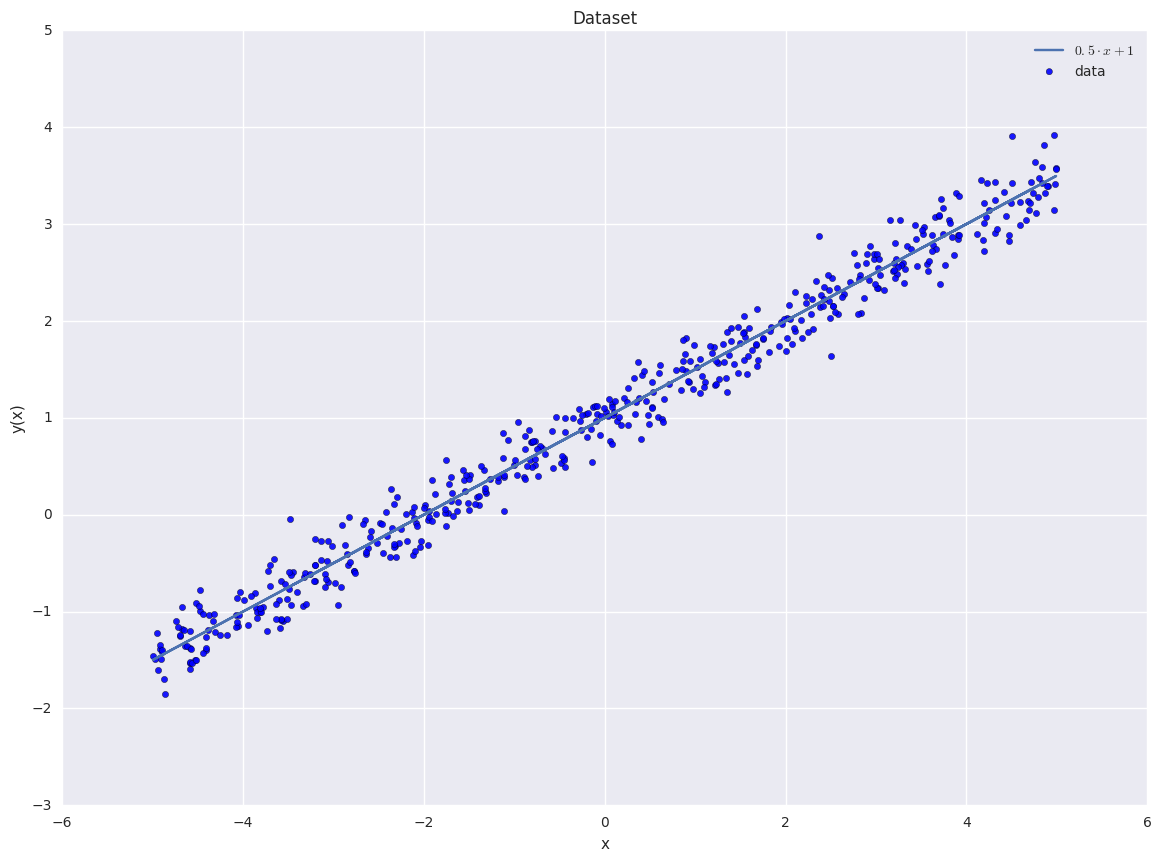

In [19]:
plt.figure(figsize=(14, 10))
plt.grid(True)
plt.scatter(dataset[0], dataset[1], label='data', alpha=0.9)
min_x, max_x = dataset[0].min(), dataset[0].max()
plt.plot(x, 0.5 * x + 1, '-', label='$0.5 \cdot x + 1$')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Dataset')
plt.show()

Минимизируем MSE, восстановим линейную зависимость


In [20]:
def Q_MSE(w, X, y): # loss function
    y_pred = w[0] * X + w[1]
    return metrics.mean_squared_error(y_pred=y_pred, y_true=y)

MSE = minimize(Q_MSE, [0., 0.], args=(dataset[0], dataset[1]))
MSE

      fun: 0.04021025398823417
 hess_inv: array([[ 0.06045527, -0.00768688],
       [-0.00768688,  1.04849036]])
      jac: array([  1.37370080e-07,   1.81607902e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 0.49969327,  0.99418823])

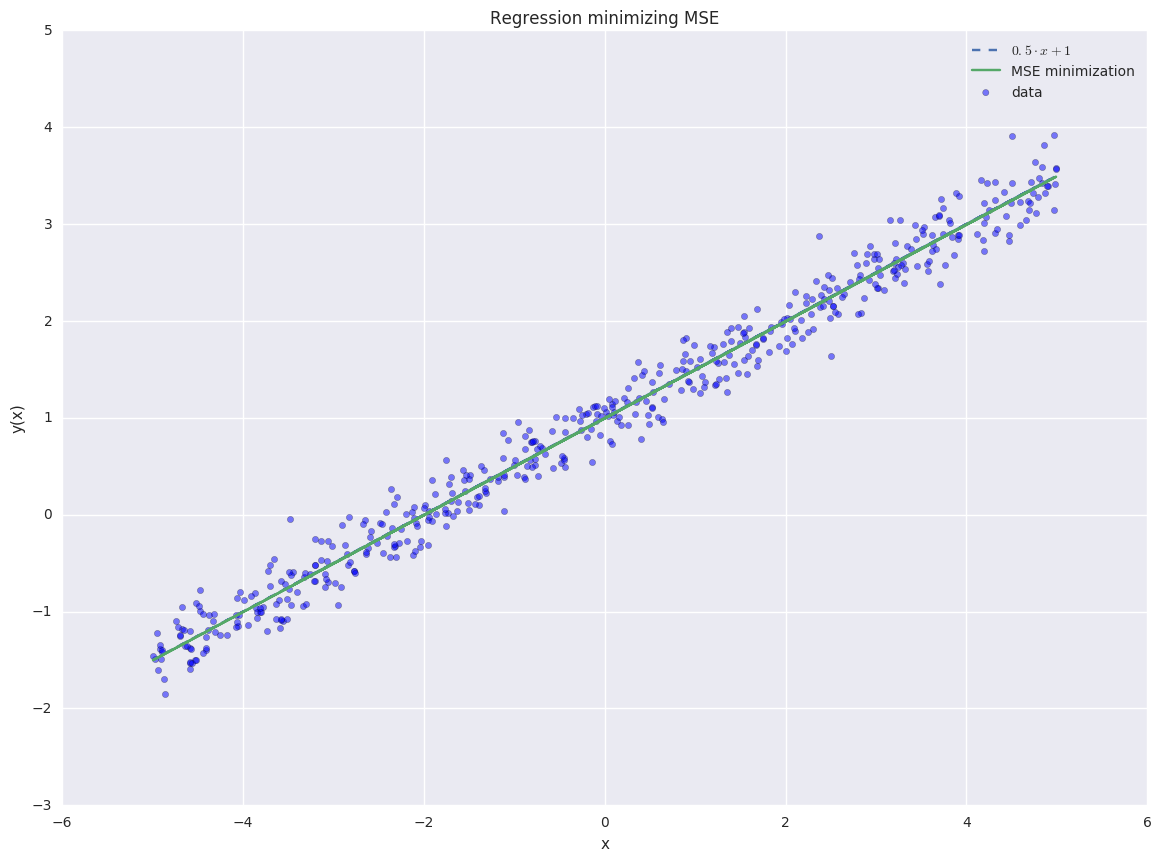

In [23]:
plt.figure(figsize=(14, 10))
plt.grid(True)
plt.scatter(dataset[0], dataset[1], label='data', alpha=0.5)
min_x, max_x = dataset[0].min(), dataset[0].max()
plt.plot(x, 0.5 * x + 1, '--', label='$0.5 \cdot x + 1$')
plt.plot(x, MSE.x[0] * x + MSE.x[1], label='MSE minimization')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Regression minimizing MSE')
plt.show()

Добавим выбросы. Визуализируем прямые, полученные минимизацией и максимизацией MSE

In [24]:
outliers_x = np.random.uniform(-border, border, size=75).reshape((75, 1))
outliers_y = -1. + np.random.normal(loc=0., scale=0.2, size=75).reshape((75, 1))
outliers = np.concatenate((outliers_x, outliers_y), axis=1).T

In [25]:

data_with_out = np.concatenate((dataset, outliers), axis=1)

In [26]:
def Q_MAE(w, X, y):
    y_pred = w[0] * X + w[1]
    return metrics.mean_absolute_error(y_pred=y_pred, y_true=y)

MSE = minimize(Q_MSE, [0., 0.], args=(data_with_out[0], data_with_out[1]))
MSE

      fun: 0.5953889064799993
 hess_inv: array([[  6.13673464e-02,   8.68431648e-04],
       [  8.68431648e-04,   1.03651452e+00]])
      jac: array([  1.71363354e-07,   1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 0.4529704 ,  0.75925891])

In [27]:
MAE = minimize(Q_MAE, [0., 0.], args=(data_with_out[0], data_with_out[1]), method='Nelder-Mead') 
MAE

 final_simplex: (array([[ 0.49694648,  0.94817998],
       [ 0.49699299,  0.94808031],
       [ 0.49697784,  0.94815477]]), array([ 0.37495617,  0.37495626,  0.37495628]))
           fun: 0.37495617035631468
       message: 'Optimization terminated successfully.'
          nfev: 137
           nit: 72
        status: 0
       success: True
             x: array([ 0.49694648,  0.94817998])

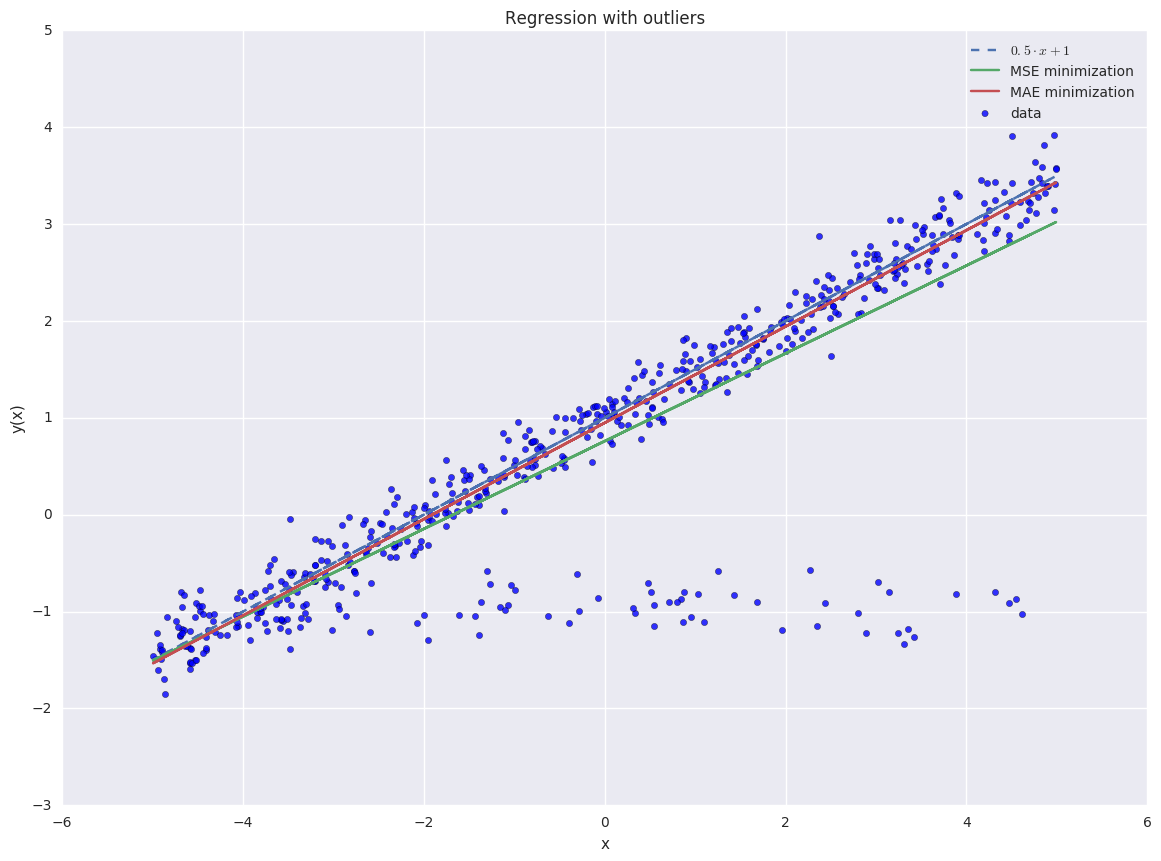

In [28]:
plt.figure(figsize=(14, 10))
plt.grid(True)
plt.scatter(data_with_out[0], data_with_out[1], label='data', alpha=0.8)
min_x, max_x = dataset[0].min(), dataset[0].max()
plt.plot(x,0.5 * x + 1, '--', label='$0.5 \cdot x + 1$')
plt.plot(x, MSE.x[0] * x + MSE.x[1], label='MSE minimization')
plt.plot(x, MAE.x[0] * x + MAE.x[1], label='MAE minimization')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Regression with outliers')
plt.show()

MSE оказалась менее устойчивой к выбросам, нежели MAE